In [3]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()


# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [4]:
# 必要なライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}±{:.3f}'.format(scores.mean(), scores.std()))
print('Cross validation scores: {:.3f}±{:.3f}'.format(scores.mean(), scores.std(ddof=1)))

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933±0.022
Cross validation scores: 0.933±0.024


In [5]:
# Practice 10-1
# ロジスティック回帰のインポート
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰クラスの初期化
log_reg = LogisticRegression(max_iter=10000, random_state=0)
# k分割交差検証の実行
scores = cross_val_score(log_reg, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}±{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.939 0.947 0.982 0.93  0.965]
Cross validation scores: 0.953±0.019


ベストスコア: 0.91
その時のパラメータ (gamma, C): (np.float64(0.001), np.float64(1.0))


<Axes: >

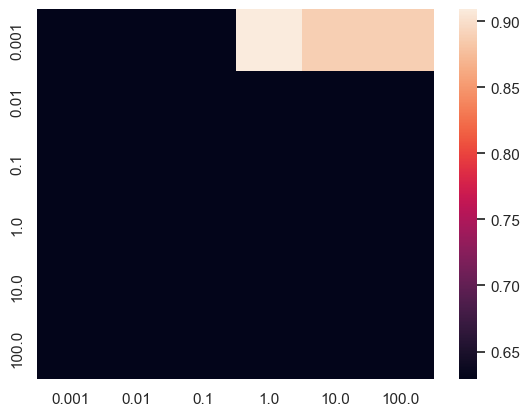

In [6]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# 検証結果をscoresに格納
scores = pd.Series(scores)

# 表示
print('ベストスコア: {:.2f}'.format(scores.max()))
print('その時のパラメータ (gamma, C): {}'.format(scores.idxmax()))

# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())

In [7]:
# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)

# GridSearchCVクラスに与えるパラメータを準備
param_grid = { 'C': np.logspace(-3, 2, num=6)
    ,'gamma':np.logspace(-3, 2, num=6)}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(),
                  param_grid=param_grid,
                  cv=5)

# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train, y_train)

# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test, y_test)))


Best cross validation score:0.925
Best parameters:{'C': np.float64(1.0), 'gamma': np.float64(0.001)}
Test score:0.909


In [8]:
# 乳がんデータに対して決定木でグリットサーチを行う
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# 乳がんのデータを読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target, # 分割の比率を保つために指定
                                                    random_state=0) # 乱数のシードを指定
# GridSearchCVクラスに与えるパラメータを準備
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5,],
              'min_samples_leaf': [2,3, 4, 5]}
# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=param_grid,
                  cv=5)
# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train, y_train)
# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))

Best cross validation score:0.951


In [9]:
# インポート
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=66)

# クラスの初期化と学習
model = SVC(gamma=0.001,C=1)
model.fit(X_train,y_train)

# 表示
print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train,y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__, model.score(X_test,y_test)))

SVC train score: 0.979
SVC test score: 0.909


In [10]:
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n{}'.format(m))

Confusion matrix:
[[48  5]
 [ 8 82]]


In [11]:
# 適合率の計算
precision = (m[1,1])/m[:, 1].sum()

# 再現率の計算
recall = (m[1,1])/m[1, :].sum()

# F1スコアの計算
f1 = 2 * (precision * recall)/(precision + recall)

print('適合率：{:.3f}'.format(precision))
print('再現率：{:.3f}'.format(recall))
print('F1値：{:.3f}'.format(f1))


適合率：0.943
再現率：0.911
F1値：0.927


In [12]:
# インポート
from sklearn.linear_model import LogisticRegression

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=66)

# LogisticRegression クラスの初期化と学習
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

# テスト用データの予測確率を計算
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

# 先頭の5行を表示
results.head()

/Users/kouhei/Program/ML/data-scientist-training-course/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,malignant,benign
0,0.004582,0.995418
1,0.000445,0.999555
2,0.033891,0.966109
3,0.007475,0.992525
4,0.003390,0.996610


In [13]:
# 良性（benign）クラスの予測確率が 0.4、0.3、0.15、0.05 以上なら、それぞれの列に 1 を設定する
for threshold in [0.4, 0.3, 0.15, 0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)

# 先頭の 10 行を表示
results.head(10)


,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.004582,0.995418,1,1,1,1
1,0.000445,0.999555,1,1,1,1
2,0.033891,0.966109,1,1,1,1
3,0.007475,0.992525,1,1,1,1
4,0.003390,0.996610,1,1,1,1
5,0.006906,0.993094,1,1,1,1
6,0.008092,0.991908,1,1,1,1
7,0.003062,0.996938,1,1,1,1
8,0.870774,0.129226,0,0,0,1
9,0.862584,0.137416,0,0,0,1


<Axes: xlabel='false positive rate', ylabel='true positive rate'>

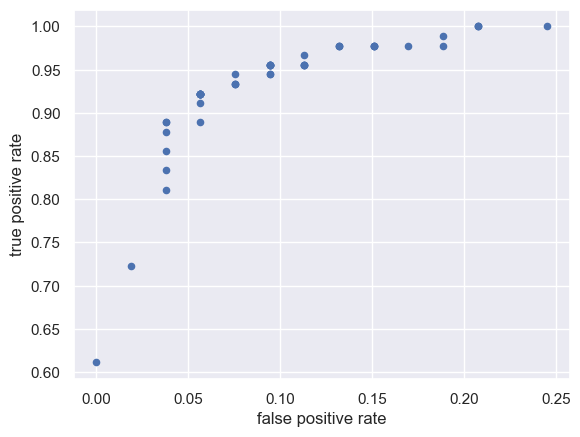

In [14]:
# 閾値を 0.01 から 0.99 の間で 50 通りとして、偽陽性率と真陽性率を計算
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x: 1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate': m[0,1] / m[0, :].sum(),
                        'true positive rate': m[1,1] / m[1, :].sum()}

# 横軸を false positive rate、縦軸を true positive rate としてプロット
pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [15]:
# インポート
from sklearn import svm
from sklearn.metrics import roc_curve, auc

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.5, random_state=66)

# SVC による予測確率の取得
model = svm.SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)

# 予測確率を取得
y_pred = model.predict_proba(X_test)[:, 1]

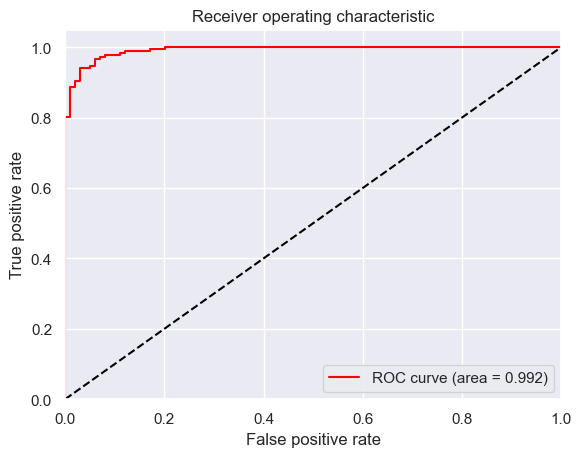

In [16]:
# 偽陽性率と真陽性率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC の算出
auc = auc(fpr, tpr)

# ROC 曲線の描画
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="best")


In [18]:
# インポート
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

# k-NNモデルとそのバギングの設定
models = {
    'kNN': KNeighborsClassifier(),
    'bagging': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

# 結果を表示
pd.Series(scores).unstack()

,test_score,train_score
bagging,0.937063,0.950704
kNN,0.923077,0.948357


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)

model = BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)
model.fit(X_train, y_train)

print('train score: {:.3f}'.format(model.score(X_train, y_train)))
print('test score: {:.3f}'.format(model.score(X_test, y_test)))

train score: 0.964
test score: 1.000


In [27]:
# インポート
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# データ読み込み
cal = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    cal.data, cal.target, random_state=66
)

# モデル定義（木とAdaBoost）
models = {
    "tree": DecisionTreeRegressor(random_state=0),
    # scikit-learn 1.2+ は base_estimator ではなく estimator
    "AdaBoost": AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
        random_state=0
    ),
}

# 学習と評価（R^2スコア）
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    scores[(name, "train_score")] = model.score(X_train, y_train)
    scores[(name, "test_score")]  = model.score(X_test, y_test)

# 結果表示
print(pd.Series(scores).unstack())


          test_score  train_score
AdaBoost    0.441671     0.424245
tree        0.611390     1.000000


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)

# AdaBoostモデルの作成と学習
model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=0),
    n_estimators=100,
    random_state=0
)
model.fit(X_train, y_train)

print('train score: {:.3f}'.format(model.score(X_train, y_train)))
print('test score: {:.3f}'.format(model.score(X_test, y_test)))

In [29]:
# インポート
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Housingデータを読み込み
boston = load_boston()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=66)

# ランダムフォレストと勾配ブースティングのパラメータ設定
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()


NameError: name 'load_boston' is not defined